In [1]:
import pandas as pd

In [2]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [22]:
import sklearn.metrics

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv("airline-passengers - airline-passengers.csv")

In [5]:
df.head

<bound method NDFrame.head of      1949-01  112
0    1949-02  118
1    1949-03  132
2    1949-04  129
3    1949-05  121
4    1949-06  135
..       ...  ...
138  1960-08  606
139  1960-09  508
140  1960-10  461
141  1960-11  390
142  1960-12  432

[143 rows x 2 columns]>

In [6]:
df

,1949-01,112
0,1949-02,118
1,1949-03,132
2,1949-04,129
3,1949-05,121
4,1949-06,135
...,...,...
138,1960-08,606
139,1960-09,508
140,1960-10,461
141,1960-11,390


In [32]:
def simple_moving_average(data, window_size):

    moving_averages = []

    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        average = sum(window) / window_size
        moving_averages.append(average)

    return moving_averages


input_file ='airline-passengers - airline-passengers.csv'
window_size = 12  

data = pd.read_csv(input_file)


sma_values = simple_moving_average(data['pass'], window_size)

mae = mean_absolute_error(data['pass'][window_size-1:], sma_values)
mse = mean_squared_error(data['pass'][window_size-1:], sma_values)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)



MAE: 34.1484962406015
MSE: 2304.887374686717
RMSE: 48.00924259647008


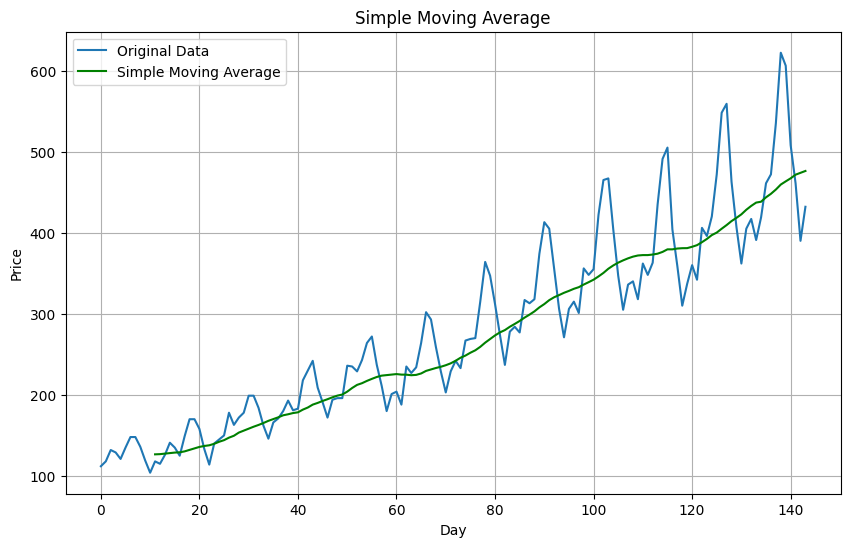

In [16]:

plt.figure(figsize=(10, 6))
plt.plot(data['pass'], label='Original Data')
plt.plot(range(window_size-1, len(data)), sma_values, label='Simple Moving Average', color='green')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Simple Moving Average')
plt.legend()
plt.grid(True)
plt.show()

MAE: 27.50049847420308
MSE: 1453.430428522176
RMSE: 38.123882652769986


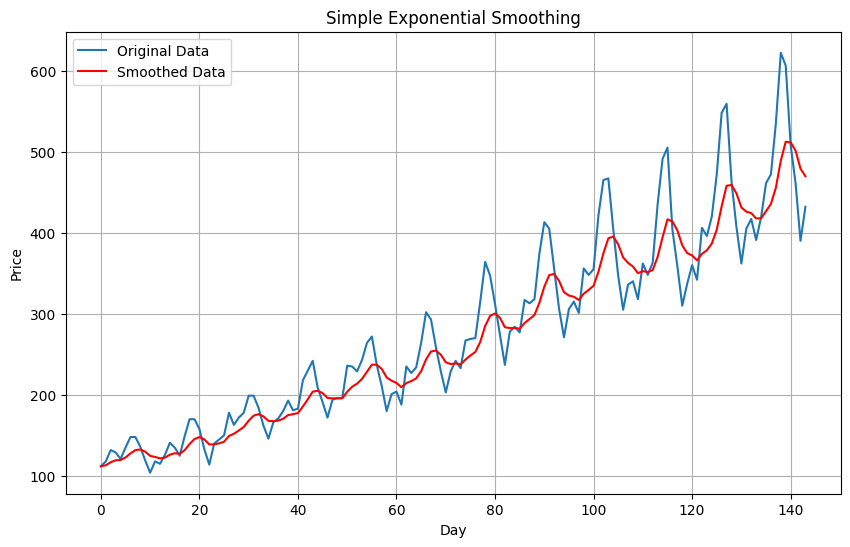

In [30]:

def simple_exponential_smoothing(data, alpha):
   
    smoothed_values = [data[0]] 

    for i in range(1, len(data)):
        smoothed_value = alpha * data[i] + (1 - alpha) * smoothed_values[-1]
        smoothed_values.append(smoothed_value)

    return smoothed_values


input_file = "airline-passengers - airline-passengers.csv"
alpha = 0.2  

data = pd.read_csv(input_file)


smoothed_values = simple_exponential_smoothing(data['pass'], alpha)

mae = mean_absolute_error(data['pass'], smoothed_values)
mse = mean_squared_error(data['pass'], smoothed_values)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

plt.figure(figsize=(10, 6))
plt.plot(data['pass'], label='Original Data')
plt.plot(smoothed_values, label='Smoothed Data', color='red')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.show()


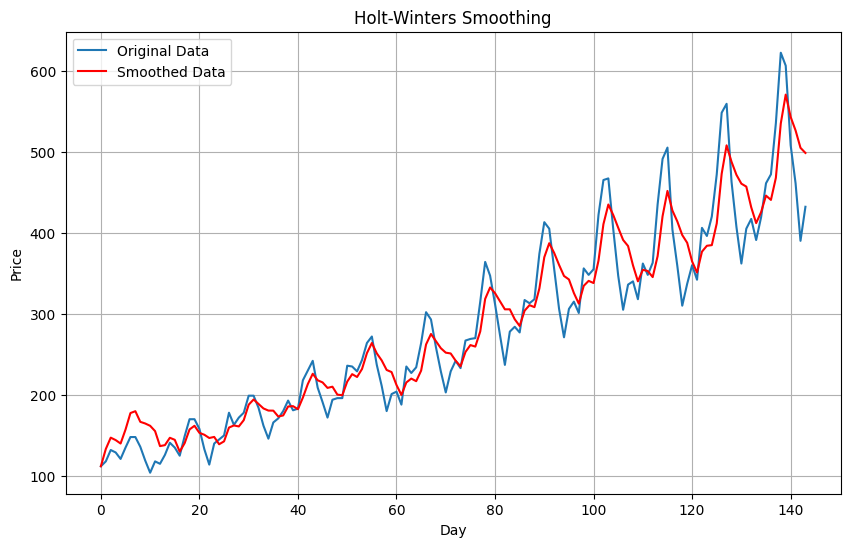

In [20]:
def holt_winters_smoothing(series, alpha, beta, gamma, seasonal_periods):
   
    level = series[0]
    trend = np.mean([series[i+seasonal_periods] - series[i] for i in range(seasonal_periods)])
    seasonal = [series[i] - level for i in range(seasonal_periods)]

    smoothed_values = [series[0]] 

    for i in range(1, len(series)):
        if i >= seasonal_periods:
            last_level, level = level, alpha * (series[i] - seasonal[i % seasonal_periods]) + (1 - alpha) * (level + trend)
            trend = beta * (level - last_level) + (1 - beta) * trend
            seasonal[i % seasonal_periods] = gamma * (series[i] - level) + (1 - gamma) * seasonal[i % seasonal_periods]
        
        smoothed_values.append(level + trend + seasonal[i % seasonal_periods])

    return smoothed_values


input_file = "airline-passengers - airline-passengers.csv"


data = pd.read_csv(input_file)


series = data['pass']


alpha = 0.2
beta = 0.2
gamma = 0.2
seasonal_periods = 4


smoothed_values = holt_winters_smoothing(series, alpha, beta, gamma, seasonal_periods)


plt.figure(figsize=(10, 6))
plt.plot(series, label='Original Data')
plt.plot(smoothed_values, label='Smoothed Data', color='red')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Holt-Winters Smoothing')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
smoothed_values = holt_winters_smoothing(series, alpha, beta, gamma, seasonal_periods)

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(series[seasonal_periods:], smoothed_values[seasonal_periods:])
mse = mean_squared_error(series[seasonal_periods:], smoothed_values[seasonal_periods:])
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 26.978052620172132
MSE: 1263.7374529228453
RMSE: 35.54908512075726


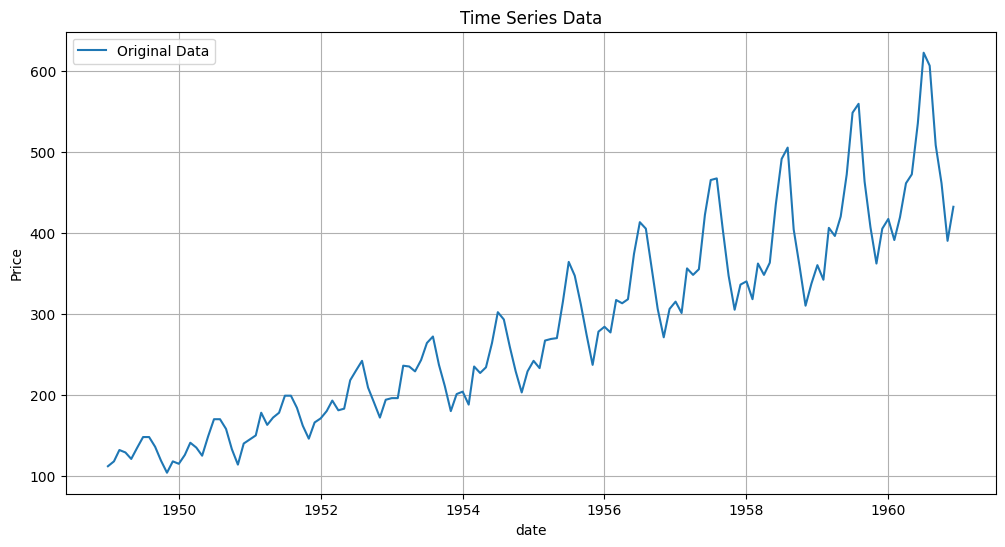

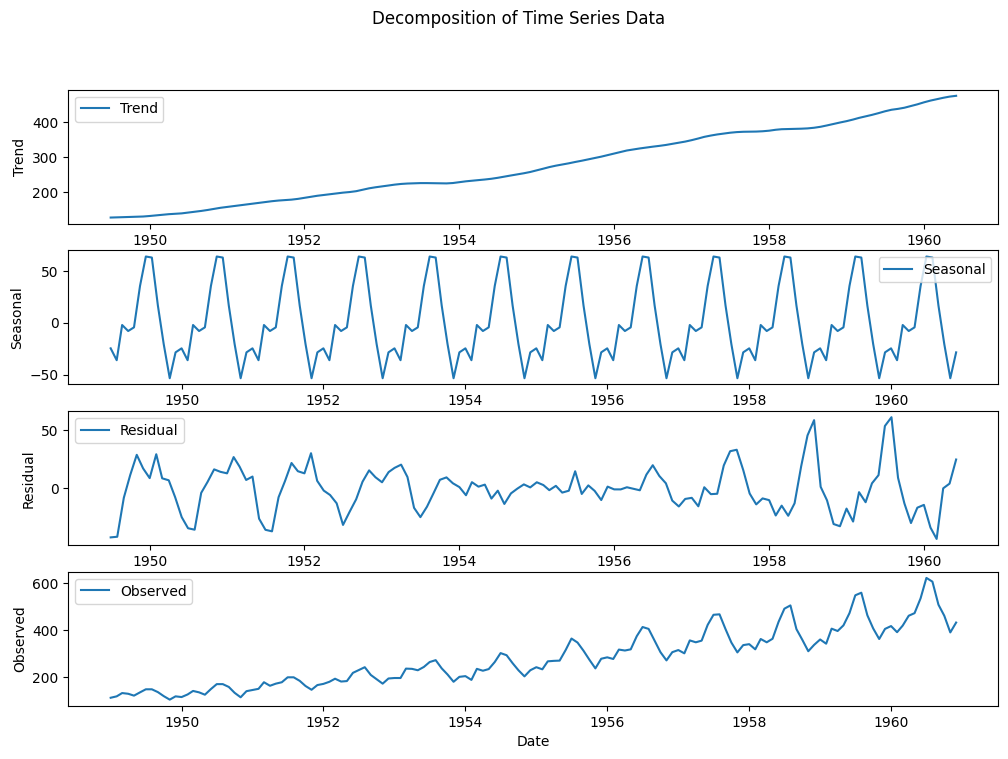

In [34]:

from statsmodels.tsa.seasonal import seasonal_decompose


input_file = "airline-passengers - airline-passengers.csv"


data = pd.read_csv(input_file)


data['date'] = pd.to_datetime(data['date'])


data.set_index('date', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(data.index, data['pass'], label='Original Data')
plt.xlabel('date')
plt.ylabel('Price')
plt.title('Time Series Data')
plt.legend()
plt.grid(True)
plt.show()


decomposition = seasonal_decompose(data['pass'], model='additive')


plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.ylabel('Trend')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.ylabel('Seasonal')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.ylabel('Residual')

plt.subplot(4, 1, 4)
plt.plot(decomposition.observed, label='Observed')
plt.legend()
plt.ylabel('Observed')

plt.xlabel('Date')
plt.suptitle('Decomposition of Time Series Data')
plt.show()
